In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import os

ƒêang load d·ªØ li·ªáu t·ª´ file combined_data.mat...

Shape c·ªßa d·ªØ li·ªáu ƒë√£ load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)


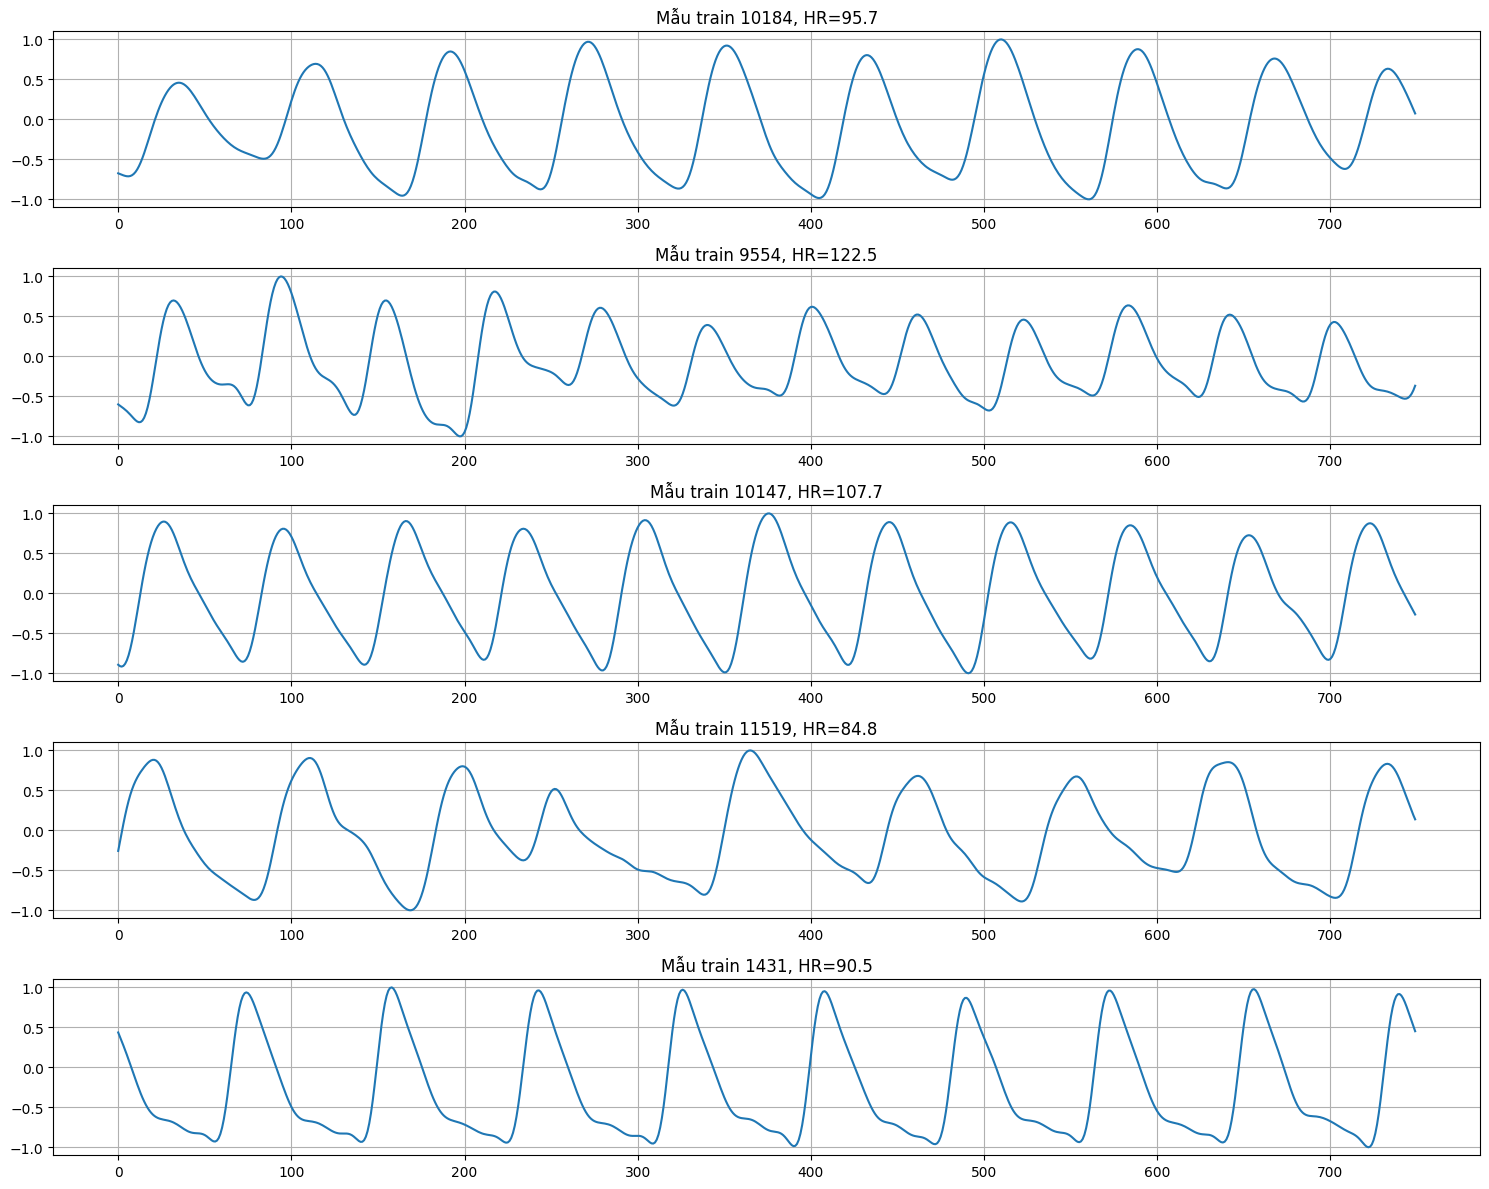

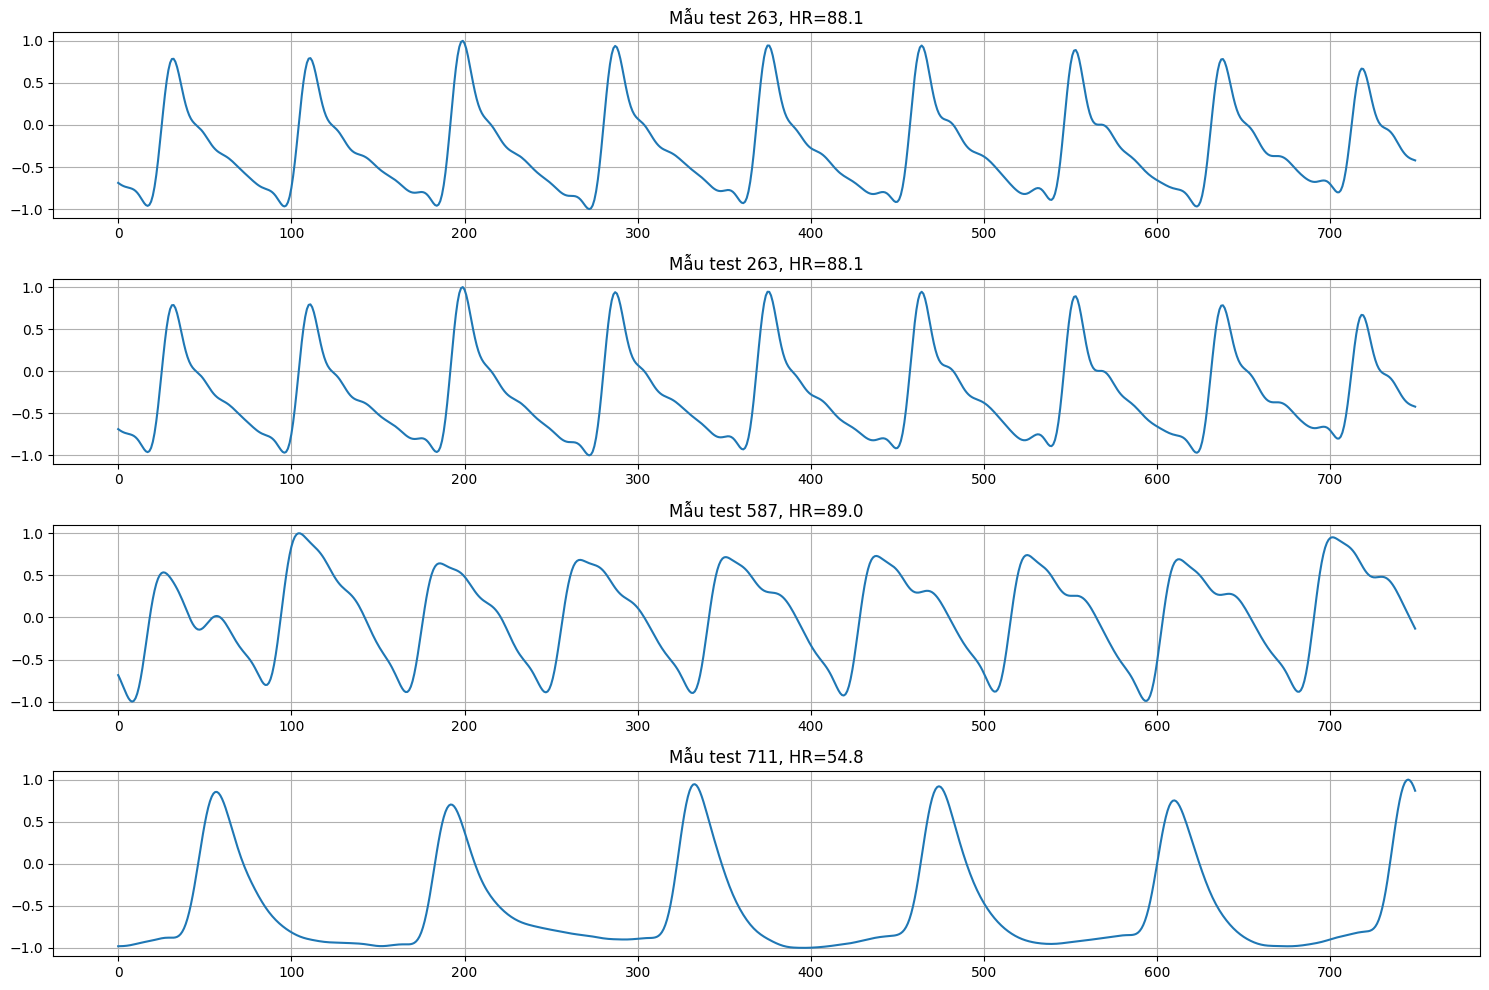

In [2]:
print("ƒêang load d·ªØ li·ªáu t·ª´ file combined_data.mat...")
loaded_data = loadmat('./combined_data.mat')

# Tr√≠ch xu·∫•t d·ªØ li·ªáu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu ƒë√£ load
print("\nShape c·ªßa d·ªØ li·ªáu ƒë√£ load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# V·∫Ω m·ªôt v√†i m·∫´u t·ª´ d·ªØ li·ªáu ƒë√£ load
plt.figure(figsize=(15, 12))

# V·∫Ω 5 m·∫´u t√≠n hi·ªáu t·ª´ t·∫≠p train
for i in range(5):
    idx = np.random.randint(0, X_train_loaded.shape[0])
    plt.subplot(5, 1, i+1)
    plt.plot(X_train_loaded[idx])
    plt.title(f'M·∫´u train {idx}, HR={hr_raw_train_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# V·∫Ω m·ªôt v√†i m·∫´u t·ª´ t·∫≠p test
plt.figure(figsize=(15, 10))

# V·∫Ω 4 m·∫´u t√≠n hi·ªáu t·ª´ t·∫≠p test
for i in range(4):
    idx = np.random.randint(0, X_test_loaded.shape[0])
    plt.subplot(4, 1, i+1)
    plt.plot(X_test_loaded[idx])
    plt.title(f'M·∫´u test {idx}, HR={hr_raw_test_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()



Shape c·ªßa d·ªØ li·ªáu ƒë√£ load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)

Th·ªëng k√™ HR raw total:
Min: 50.23, Max: 143.53
Mean: 86.85, Std: 17.46
Mean ¬± Std: 86.85 ¬± 17.46


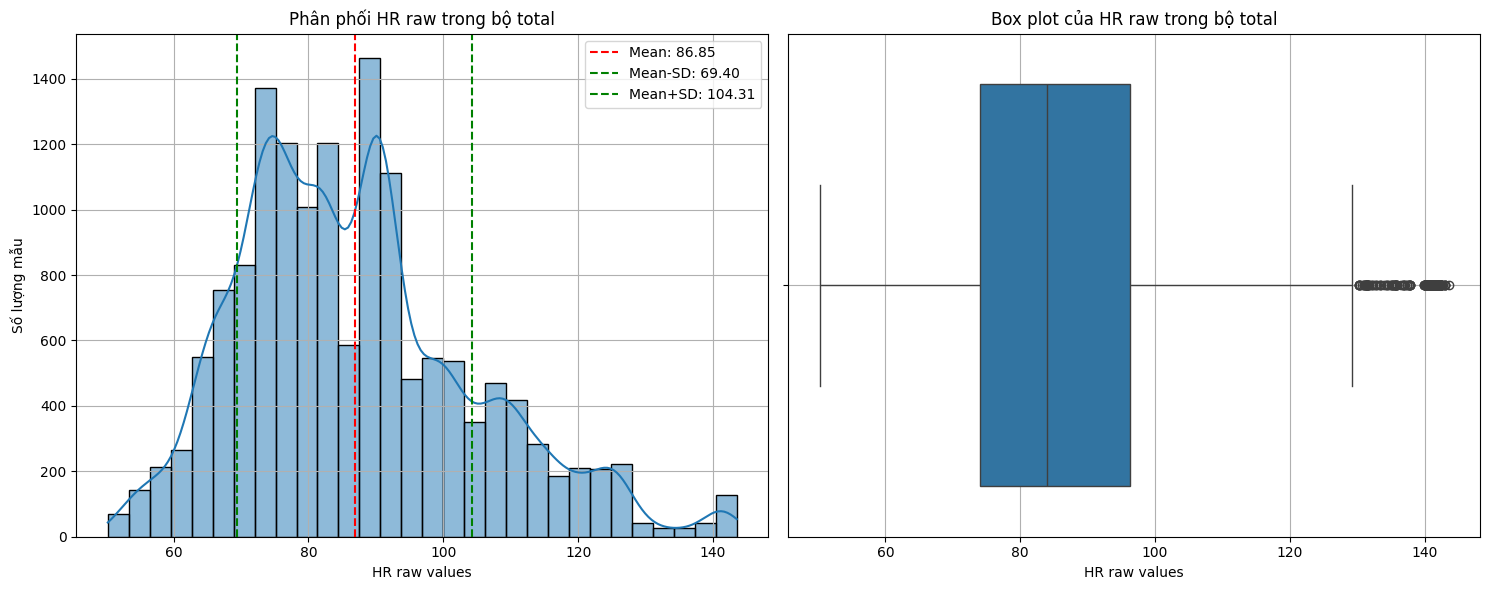


L·ªçc d·ªØ li·ªáu trong kho·∫£ng HR raw: [51.94, 121.77]

Th·ªëng k√™ HR raw total sau khi chu·∫©n h√≥a:
Min: 0.0002, Max: 0.9997
Mean: 0.4711, Std: 0.2128


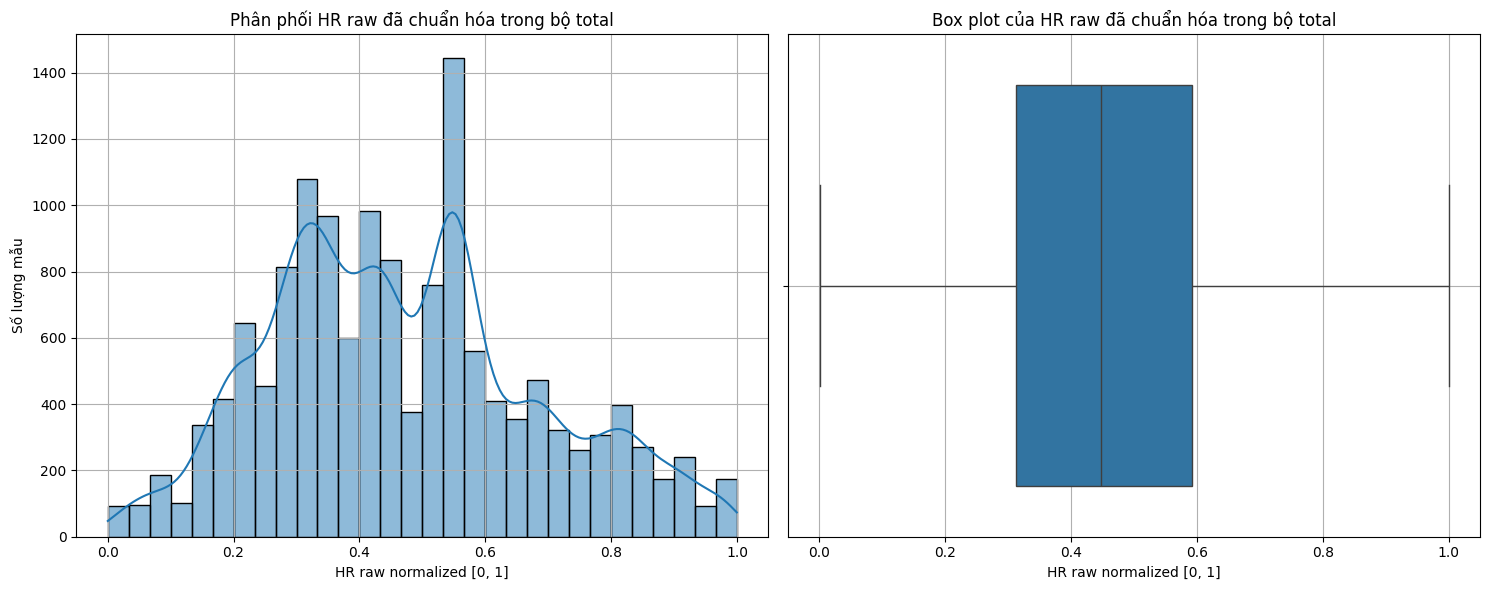

S·ªë m·∫´u train ban ƒë·∫ßu: 11956
S·ªë m·∫´u train sau khi l·ªçc: 11376
T·ª∑ l·ªá gi·ªØ l·∫°i (train): 95.15%
S·ªë m·∫´u test ban ƒë·∫ßu: 2990
S·ªë m·∫´u test sau khi l·ªçc: 2845
T·ª∑ l·ªá gi·ªØ l·∫°i (test): 95.15%

Th·ªëng k√™ HR raw sau khi chia t·∫≠p:
Train - Min: 0.0002, Max: 0.9997
Train - Mean: 0.4701, Std: 0.2132
Test - Min: 0.0045, Max: 0.9985
Test - Mean: 0.4750, Std: 0.2112


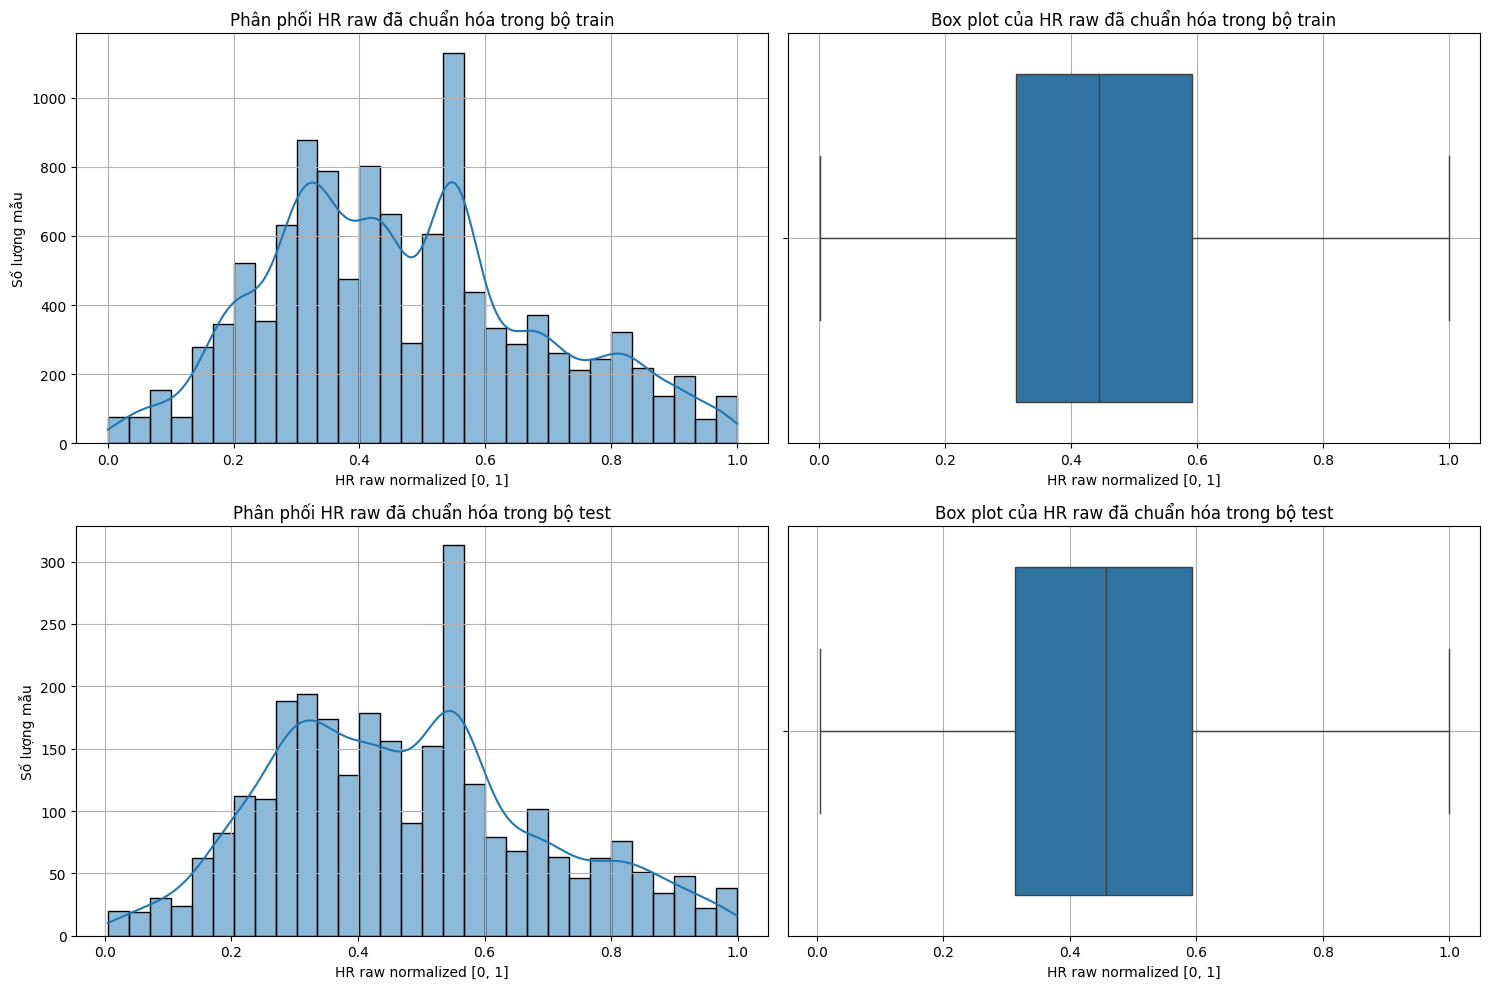

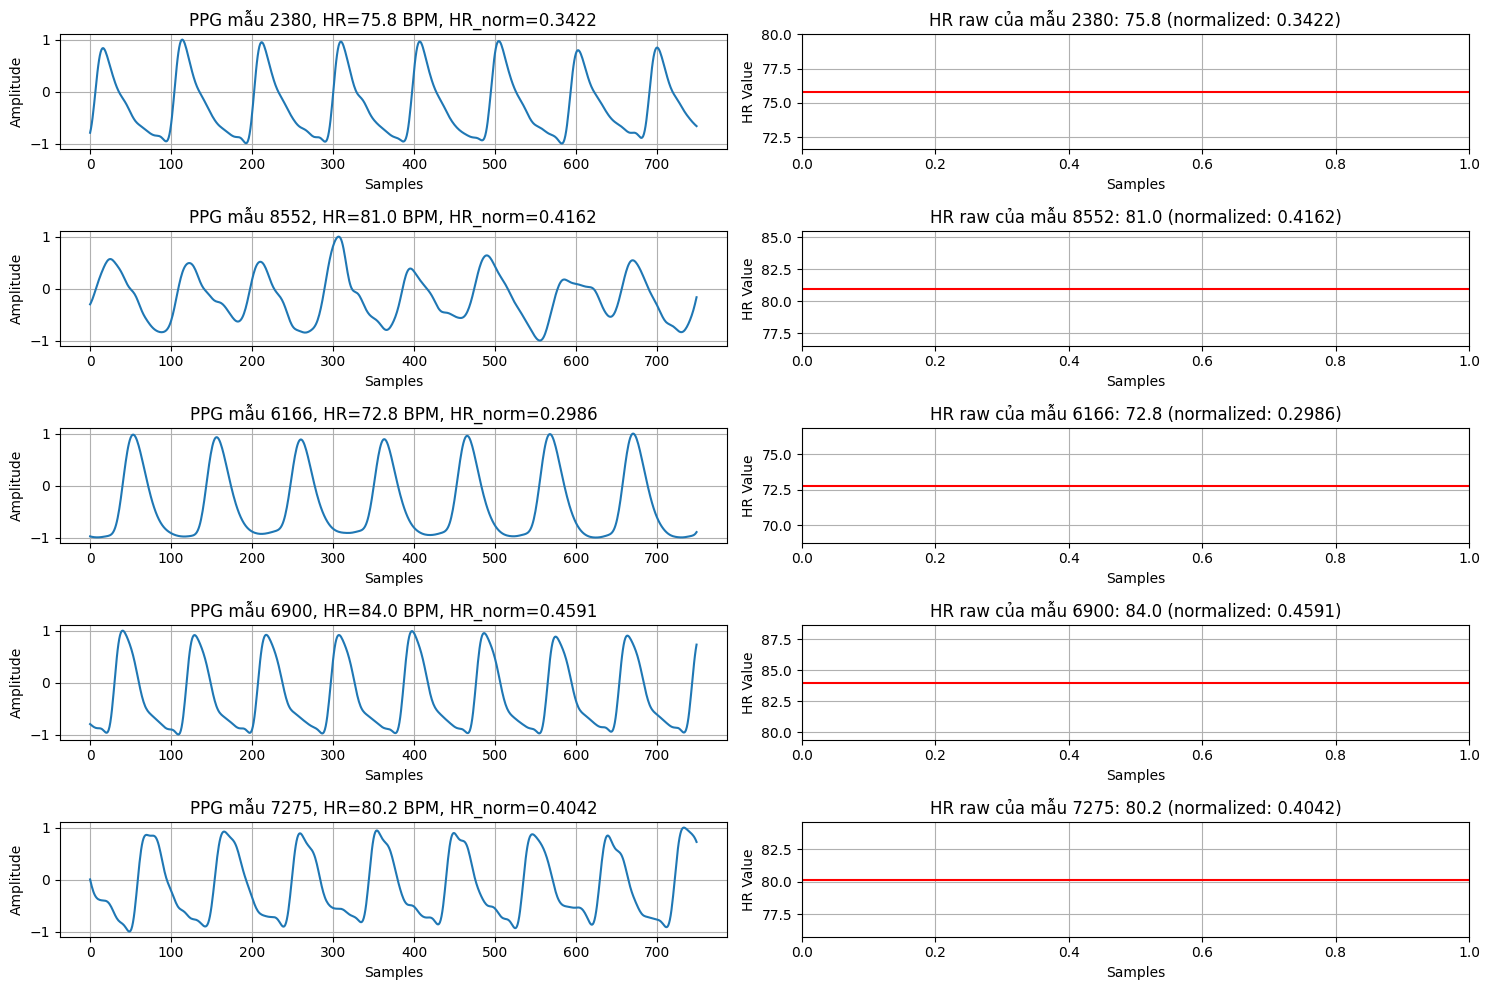

In [3]:
# Tr√≠ch xu·∫•t d·ªØ li·ªáu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten ƒë·ªÉ chuy·ªÉn t·ª´ (1, n) th√†nh (n,)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu ƒë√£ load
print("\nShape c·ªßa d·ªØ li·ªáu ƒë√£ load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# T√≠nh to√°n th·ªëng k√™ cho hr_raw_total_loaded
hr_raw_total_min = np.min(hr_raw_total_loaded)
hr_raw_total_max = np.max(hr_raw_total_loaded)
hr_raw_total_mean = np.mean(hr_raw_total_loaded)
hr_raw_total_std = np.std(hr_raw_total_loaded)

# In th·ªëng k√™
print("\nTh·ªëng k√™ HR raw total:")
print(f"Min: {hr_raw_total_min:.2f}, Max: {hr_raw_total_max:.2f}")
print(f"Mean: {hr_raw_total_mean:.2f}, Std: {hr_raw_total_std:.2f}")
print(f"Mean ¬± Std: {hr_raw_total_mean:.2f} ¬± {hr_raw_total_std:.2f}")

# V·∫Ω ph√¢n ph·ªëi HR raw c·ªßa b·ªô total
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_loaded, kde=True, bins=30)
plt.title('Ph√¢n ph·ªëi HR raw trong b·ªô total')
plt.xlabel('HR raw values')
plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u')
plt.axvline(hr_raw_total_mean, color='r', linestyle='--', label=f'Mean: {hr_raw_total_mean:.2f}')
plt.axvline(hr_raw_total_mean - hr_raw_total_std, color='g', linestyle='--', label=f'Mean-SD: {hr_raw_total_mean - hr_raw_total_std:.2f}')
plt.axvline(hr_raw_total_mean + hr_raw_total_std, color='g', linestyle='--', label=f'Mean+SD: {hr_raw_total_mean + hr_raw_total_std:.2f}')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_loaded)
plt.title('Box plot c·ªßa HR raw trong b·ªô total')
plt.xlabel('HR raw values')
plt.grid(True)

plt.tight_layout()
plt.show()

# L·ªçc d·ªØ li·ªáu n·∫±m trong ph·∫°m vi mean ¬± 2*std c·ªßa HR raw total
hr_raw_lower_bound = hr_raw_total_mean - 2 * hr_raw_total_std
hr_raw_upper_bound = hr_raw_total_mean + 2 * hr_raw_total_std

print(f"\nL·ªçc d·ªØ li·ªáu trong kho·∫£ng HR raw: [{hr_raw_lower_bound:.2f}, {hr_raw_upper_bound:.2f}]")

# T·∫°o mask cho c√°c m·∫´u n·∫±m trong kho·∫£ng cho to√†n b·ªô d·ªØ li·ªáu total
valid_mask_total = np.logical_and(
    hr_raw_total_loaded >= hr_raw_lower_bound,
    hr_raw_total_loaded <= hr_raw_upper_bound
)

# L·ªçc d·ªØ li·ªáu total
X_total_filtered = X_total_loaded[valid_mask_total]
hr_raw_total_filtered = hr_raw_total_loaded[valid_mask_total]

# Chu·∫©n h√≥a HR raw v·ªÅ kho·∫£ng [0, 1] d·ª±a tr√™n mean v√† std ƒë√£ bi·∫øt
hr_raw_mean = hr_raw_total_mean
hr_raw_std = hr_raw_total_std

# H√†m chu·∫©n h√≥a HR raw v·ªÅ kho·∫£ng [0, 1]
def normalize_hr_raw(hr_raw_data, mean=hr_raw_mean, std=hr_raw_std):
    # S·ª≠ d·ª•ng min-max normalization ƒë·ªÉ scale v·ªÅ [0, 1]
    # L·∫•y gi√° tr·ªã min v√† max t·ª´ d·ªØ li·ªáu ƒë√£ l·ªçc
    hr_min = hr_raw_lower_bound  # S·ª≠ d·ª•ng gi√° tr·ªã bi√™n d∆∞·ªõi ƒë√£ l·ªçc
    hr_max = hr_raw_upper_bound  # S·ª≠ d·ª•ng gi√° tr·ªã bi√™n tr√™n ƒë√£ l·ªçc

    # C√¥ng th·ª©c chu·∫©n h√≥a min-max: (x - min) / (max - min)
    normalized = (hr_raw_data - hr_min) / (hr_max - hr_min)

    # ƒê·∫£m b·∫£o gi√° tr·ªã n·∫±m trong kho·∫£ng [0, 1]
    normalized = np.clip(normalized, 0, 1)

    return normalized

# √Åp d·ª•ng chu·∫©n h√≥a cho d·ªØ li·ªáu total ƒë√£ l·ªçc
hr_raw_total_normalized = normalize_hr_raw(hr_raw_total_filtered)

# Ki·ªÉm tra k·∫øt qu·∫£ chu·∫©n h√≥a
print("\nTh·ªëng k√™ HR raw total sau khi chu·∫©n h√≥a:")
print(f"Min: {np.min(hr_raw_total_normalized):.4f}, Max: {np.max(hr_raw_total_normalized):.4f}")
print(f"Mean: {np.mean(hr_raw_total_normalized):.4f}, Std: {np.std(hr_raw_total_normalized):.4f}")

# V·∫Ω ph√¢n ph·ªëi HR raw sau khi chu·∫©n h√≥a
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_normalized, kde=True, bins=30)
plt.title('Ph√¢n ph·ªëi HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô total')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_normalized)
plt.title('Box plot c·ªßa HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô total')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Chia l·∫°i th√†nh t·∫≠p train v√† test t·ª´ d·ªØ li·ªáu total ƒë√£ l·ªçc v√† chu·∫©n h√≥a
from sklearn.model_selection import train_test_split

# S·ª≠ d·ª•ng t·ª∑ l·ªá 80% train, 20% test
X_train_filtered, X_test_filtered, hr_raw_train_normalized, hr_raw_test_normalized = train_test_split(
    X_total_filtered, hr_raw_total_normalized, test_size=0.2, random_state=42
)

# L·∫•y gi√° tr·ªã HR raw g·ªëc t∆∞∆°ng ·ª©ng cho vi·ªác hi·ªÉn th·ªã - S·ª≠a l·ªói MemoryError
# Thay v√¨ t·∫°o b·∫£n sao m·ªõi, s·ª≠ d·ª•ng l·∫°i indices t·ª´ l·∫ßn split tr∆∞·ªõc
train_indices = np.arange(len(X_total_filtered))
train_indices, test_indices = train_test_split(
    train_indices, test_size=0.2, random_state=42
)
hr_raw_train_filtered = hr_raw_total_filtered[train_indices]
hr_raw_test_filtered = hr_raw_total_filtered[test_indices]

# In th√¥ng tin v·ªÅ s·ªë l∆∞·ª£ng m·∫´u ƒë√£ l·ªçc
print(f"S·ªë m·∫´u train ban ƒë·∫ßu: {X_train_loaded.shape[0]}")
print(f"S·ªë m·∫´u train sau khi l·ªçc: {X_train_filtered.shape[0]}")
print(f"T·ª∑ l·ªá gi·ªØ l·∫°i (train): {X_train_filtered.shape[0]/X_train_loaded.shape[0]*100:.2f}%")

print(f"S·ªë m·∫´u test ban ƒë·∫ßu: {X_test_loaded.shape[0]}")
print(f"S·ªë m·∫´u test sau khi l·ªçc: {X_test_filtered.shape[0]}")
print(f"T·ª∑ l·ªá gi·ªØ l·∫°i (test): {X_test_filtered.shape[0]/X_test_loaded.shape[0]*100:.2f}%")

# Ki·ªÉm tra th·ªëng k√™ HR raw sau khi chia t·∫≠p
print("\nTh·ªëng k√™ HR raw sau khi chia t·∫≠p:")
print(f"Train - Min: {np.min(hr_raw_train_normalized):.4f}, Max: {np.max(hr_raw_train_normalized):.4f}")
print(f"Train - Mean: {np.mean(hr_raw_train_normalized):.4f}, Std: {np.std(hr_raw_train_normalized):.4f}")
print(f"Test - Min: {np.min(hr_raw_test_normalized):.4f}, Max: {np.max(hr_raw_test_normalized):.4f}")
print(f"Test - Mean: {np.mean(hr_raw_test_normalized):.4f}, Std: {np.std(hr_raw_test_normalized):.4f}")

# V·∫Ω ph√¢n ph·ªëi HR raw sau khi chia t·∫≠p
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(hr_raw_train_normalized, kde=True, bins=30)
plt.title('Ph√¢n ph·ªëi HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô train')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=hr_raw_train_normalized)
plt.title('Box plot c·ªßa HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô train')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(hr_raw_test_normalized, kde=True, bins=30)
plt.title('Ph√¢n ph·ªëi HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô test')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(x=hr_raw_test_normalized)
plt.title('Box plot c·ªßa HR raw ƒë√£ chu·∫©n h√≥a trong b·ªô test')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# V·∫Ω m·ªôt v√†i m·∫´u ƒë·ªÉ double check
plt.figure(figsize=(15, 10))
for i in range(5):
    idx = np.random.randint(0, X_train_filtered.shape[0])

    # V·∫Ω t√≠n hi·ªáu PPG
    plt.subplot(5, 2, i*2+1)
    plt.plot(X_train_filtered[idx])
    plt.title(f'PPG m·∫´u {idx}, HR={hr_raw_train_filtered[idx]:.1f} BPM, HR_norm={hr_raw_train_normalized[idx]:.4f}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # V·∫Ω t√≠n hi·ªáu HR raw t∆∞∆°ng ·ª©ng
    plt.subplot(5, 2, i*2+2)
    plt.axhline(hr_raw_train_filtered[idx], color='r')
    plt.title(f'HR raw c·ªßa m·∫´u {idx}: {hr_raw_train_filtered[idx]:.1f} (normalized: {hr_raw_train_normalized[idx]:.4f})')
    plt.xlabel('Samples')
    plt.ylabel('HR Value')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [4]:
# Thi·∫øt l·∫≠p device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"S·ª≠ d·ª•ng device: {device}")

# Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu ƒë√£ l·ªçc v√† chu·∫©n h√≥a th√†nh tensor
X_train_tensor = torch.FloatTensor(X_train_filtered)
hr_raw_train_tensor = torch.FloatTensor(hr_raw_train_normalized.reshape(-1, 1))  # Reshape ƒë·ªÉ c√≥ shape (n, 1)

X_test_tensor = torch.FloatTensor(X_test_filtered)
hr_raw_test_tensor = torch.FloatTensor(hr_raw_test_normalized.reshape(-1, 1))  # Reshape ƒë·ªÉ c√≥ shape (n, 1)

# T·∫°o dataset v√† dataloader
train_dataset = TensorDataset(X_train_tensor, hr_raw_train_tensor)
test_dataset = TensorDataset(X_test_tensor, hr_raw_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

S·ª≠ d·ª•ng device: cuda


In [5]:
import scipy.io as sio
data_to_save = {
    'X_train_filtered': X_train_filtered,
    'hr_raw_train_normalized': hr_raw_train_normalized,
    'X_test_filtered': X_test_filtered,
    'hr_raw_test_normalized': hr_raw_test_normalized
}
sio.savemat('final_combined_data.mat', data_to_save)
print("ƒê√£ l∆∞u d·ªØ li·ªáu v√†o file final_combined_data.mat th√†nh c√¥ng!")

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu
print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"hr_raw_train_normalized shape: {hr_raw_train_normalized.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"hr_raw_test_normalized shape: {hr_raw_test_normalized.shape}")

# Ki·ªÉm tra k√≠ch th∆∞·ªõc d·ªØ li·ªáu trong dataloader
sample_data, sample_condition = next(iter(train_loader))
print(f"Batch data shape: {sample_data.shape}")
print(f"Batch condition shape: {sample_condition.shape}")

# Thi·∫øt l·∫≠p c√°c tham s·ªë cho m√¥ h√¨nh d·ª±a tr√™n d·ªØ li·ªáu m·ªõi
input_size = X_train_filtered.shape[1]  # K√≠ch th∆∞·ªõc c·ªßa t√≠n hi·ªáu PPG t·ª´ d·ªØ li·ªáu ƒë√£ load
condition_size = 1  # K√≠ch th∆∞·ªõc c·ªßa ƒëi·ªÅu ki·ªán (HR raw ƒë√£ chu·∫©n h√≥a)
latent_dim = 64  # K√≠ch th∆∞·ªõc kh√¥ng gian ti·ªÅm ·∫©n
hidden_dims = [256, 128, 64]  # K√≠ch th∆∞·ªõc c√°c l·ªõp ·∫©n

print(f"X√¢y d·ª±ng m√¥ h√¨nh v·ªõi input_size={input_size}, condition_size={condition_size}")


ƒê√£ l∆∞u d·ªØ li·ªáu v√†o file final_combined_data.mat th√†nh c√¥ng!
X_train_filtered shape: (11376, 750)
hr_raw_train_normalized shape: (11376,)
X_test_filtered shape: (2845, 750)
hr_raw_test_normalized shape: (2845,)
Batch data shape: torch.Size([64, 750])
Batch condition shape: torch.Size([64, 1])
X√¢y d·ª±ng m√¥ h√¨nh v·ªõi input_size=750, condition_size=1


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Generator (k·∫øt h·ª£p noise + HR ‚Üí PPG signal)
class CGANGenerator(nn.Module):
    def __init__(self, noise_dim, condition_dim, output_dim=750):
        super(CGANGenerator, self).__init__()
        self.fc = nn.Linear(noise_dim + condition_dim, 128 * 47)
        self.net = nn.Sequential(
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.ConvTranspose1d(32, 1, kernel_size=6, stride=4, padding=1),
            nn.Tanh()
        )

    def forward(self, z, condition):
        x = torch.cat([z, condition], dim=1)
        x = self.fc(x).view(-1, 128, 47)
        x = self.net(x)
        x = x[:, :, :750]
        return x.view(-1, 750)


# Discriminator (nh·∫≠n PPG + HR ‚Üí x√°c su·∫•t real/fake)
class CGANDiscriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(CGANDiscriminator, self).__init__()
        self.condition_fc = nn.Linear(condition_dim, input_dim)  # ƒëi·ªÅu ki·ªán HR ‚Üí map th√†nh vector c√πng chi·ªÅu v·ªõi PPG
        self.net = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * (input_dim // 8), 1),
            nn.Sigmoid()
        )

    def forward(self, x, condition):
        condition_expanded = self.condition_fc(condition)  # shape: (batch, 750)
        x = x + condition_expanded  # g·ªôp ƒëi·ªÅu ki·ªán HR b·∫±ng c√°ch c·ªông
        x = x.view(-1, 1, x.shape[1])  # reshape v·ªÅ (batch, 1, signal_length)
        return self.net(x)


# Tham s·ªë
noise_dim = 30
condition_dim = 1
output_dim = 750

# Kh·ªüi t·∫°o m√¥ h√¨nh
generator = CGANGenerator(noise_dim, condition_dim, output_dim).to(device)
discriminator = CGANDiscriminator(output_dim, condition_dim).to(device)

# Optimizers
lr = 1e-5
beta1 = 0.5
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


# In t·ªïng s·ªë tham s·ªë
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Generator Parameters:")
for name, param in generator.named_parameters():
    print(f"{name}: {param.shape}")

print("\nDiscriminator Parameters:")
for name, param in discriminator.named_parameters():
    print(f"{name}: {param.shape}")

print("\nTotal Parameters in Generator:", count_parameters(generator))
print("Total Parameters in Discriminator:", count_parameters(discriminator))
print("Total Parameters in both models:", count_parameters(generator) + count_parameters(discriminator))


# Ki·ªÉm tra 1 forward pass
z = torch.randn(1, noise_dim).to(device)
hr = torch.randn(1, condition_dim).to(device)

fake_ppg = generator(z, hr)
print("\nSample generated PPG:", fake_ppg)

real_ppg = torch.randn(1, output_dim).to(device)
real_output = discriminator(real_ppg, hr)
fake_output = discriminator(fake_ppg, hr)

print("\nDiscriminator output for real PPG:", real_output)
print("Discriminator output for fake PPG:", fake_output)


Generator Parameters:
fc.weight: torch.Size([6016, 31])
fc.bias: torch.Size([6016])
net.0.weight: torch.Size([128])
net.0.bias: torch.Size([128])
net.2.weight: torch.Size([128, 64, 4])
net.2.bias: torch.Size([64])
net.3.weight: torch.Size([64])
net.3.bias: torch.Size([64])
net.5.weight: torch.Size([64, 32, 4])
net.5.bias: torch.Size([32])
net.6.weight: torch.Size([32])
net.6.bias: torch.Size([32])
net.8.weight: torch.Size([32, 1, 6])
net.8.bias: torch.Size([1])

Discriminator Parameters:
condition_fc.weight: torch.Size([750, 1])
condition_fc.bias: torch.Size([750])
net.0.weight: torch.Size([32, 1, 4])
net.0.bias: torch.Size([32])
net.2.weight: torch.Size([64, 32, 4])
net.2.bias: torch.Size([64])
net.4.weight: torch.Size([128, 64, 4])
net.4.bias: torch.Size([128])
net.7.weight: torch.Size([1, 11904])
net.7.bias: torch.Size([1])

Total Parameters in Generator: 234209
Total Parameters in Discriminator: 54717
Total Parameters in both models: 288926

Sample generated PPG: tensor([[ 7.2045e-

In [55]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# === THI·∫æT L·∫¨P SI√äU THAM S·ªê ===
batch_size = 64
epochs = 400
noise_dim = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = X_train_filtered.shape[1]  # 750 (t√≠n hi·ªáu PPG)
condition_size = 1  # HR (ƒëi·ªÅu ki·ªán)
latent_dim = 64  # Kh√¥ng gian ti·ªÅm ·∫©n
lr = 1e-5  # Learning rate t·ªët h∆°n cho CGAN

# === T·∫†O DATASET ===
# Chuy·ªÉn d·ªØ li·ªáu v·ªÅ d·∫°ng tensor v√† ƒë·∫£m b·∫£o HR c√≥ shape (N, 1)
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
HR_train_tensor = torch.tensor(hr_raw_train_normalized, dtype=torch.float32).view(-1, 1)  # ƒê·ªãnh d·∫°ng (N, 1)

train_dataset = TensorDataset(X_train_tensor, HR_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# === KH·ªûI T·∫†O M√î H√åNH CGAN ===
generator = CGANGenerator(noise_dim, condition_size, input_size).to(device)
discriminator = CGANDiscriminator(input_size, condition_size).to(device)

# === LOSS V√Ä OPTIMIZER ===
adversarial_loss = nn.BCELoss().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# === HU·∫§N LUY·ªÜN CGAN ===
for epoch in range(epochs):
    generator.train()
    discriminator.train()
    
    total_g_loss = 0
    total_d_loss = 0

    for real_data, hr in train_loader:
        real_data = real_data.to(device)
        hr = hr.to(device)
        batch_size = real_data.size(0)

        # ====================
        # Train Discriminator
        # ====================
        optimizer_D.zero_grad()

        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Discriminator v·ªõi real
        real_output = discriminator(real_data, hr)
        d_real_loss = adversarial_loss(real_output, valid)

        # Discriminator v·ªõi fake
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_data = generator(z, hr)
        fake_output = discriminator(fake_data.detach(), hr)
        d_fake_loss = adversarial_loss(fake_output, fake)

        # T·ªïng loss
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ====================
        # Train Generator
        # ====================
        optimizer_G.zero_grad()

        fake_output = discriminator(fake_data, hr)
        g_loss = adversarial_loss(fake_output, valid)  # Mu·ªën ƒë√°nh l·ª´a D

        g_loss.backward()
        optimizer_G.step()

        total_g_loss += g_loss.item()
        total_d_loss += d_loss.item()

    # In log m·ªói 10 epochs
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"[Epoch {epoch}/{epochs}] D_loss: {total_d_loss:.4f} | G_loss: {total_g_loss:.4f}")

print("üéâ Training completed!")


[Epoch 0/400] D_loss: 234.4987 | G_loss: 128.1730
[Epoch 10/400] D_loss: 207.7731 | G_loss: 149.6217
[Epoch 20/400] D_loss: 196.2252 | G_loss: 156.5001
[Epoch 30/400] D_loss: 168.2375 | G_loss: 185.5213
[Epoch 40/400] D_loss: 179.0988 | G_loss: 185.3178
[Epoch 50/400] D_loss: 194.4603 | G_loss: 176.7767
[Epoch 60/400] D_loss: 204.6404 | G_loss: 169.3997
[Epoch 70/400] D_loss: 212.7933 | G_loss: 161.5148
[Epoch 80/400] D_loss: 220.6037 | G_loss: 153.2382
[Epoch 90/400] D_loss: 227.4707 | G_loss: 145.7079
[Epoch 100/400] D_loss: 230.6700 | G_loss: 141.1418
[Epoch 110/400] D_loss: 233.3345 | G_loss: 137.8444
[Epoch 120/400] D_loss: 235.4321 | G_loss: 135.1619
[Epoch 130/400] D_loss: 237.1301 | G_loss: 133.3493
[Epoch 140/400] D_loss: 238.6916 | G_loss: 131.6683
[Epoch 150/400] D_loss: 239.4237 | G_loss: 130.6502
[Epoch 160/400] D_loss: 240.2313 | G_loss: 129.7672
[Epoch 170/400] D_loss: 240.9635 | G_loss: 129.0775
[Epoch 180/400] D_loss: 241.5935 | G_loss: 128.5203
[Epoch 190/400] D_loss:

In [57]:
def denormalize_hr(normalized_hr, min_hr=51.94, max_hr=121.77):
    """
    Chuy·ªÉn ƒë·ªïi t·ª´ HR chu·∫©n h√≥a v·ªÅ HR th·ª±c

    Args:
        normalized_hr: gi√° tr·ªã HR ƒë√£ chu·∫©n h√≥a (0-1)
        min_hr: gi√° tr·ªã HR t·ªëi thi·ªÉu
        max_hr: gi√° tr·ªã HR t·ªëi ƒëa

    Returns:
        actual_hr: gi√° tr·ªã HR th·ª±c
    """
    return normalized_hr * (max_hr - min_hr) + min_hr


Generated PPG for HR = 99.8 bpm:
Generated PPG Signal: tensor([[-0.4278, -0.2863, -0.3126, -0.3029, -0.3763, -0.3783, -0.4276, -0.3881,
         -0.4872, -0.4824, -0.5537, -0.5333, -0.5445, -0.4859, -0.5633, -0.5942,
         -0.5972, -0.5914, -0.6010, -0.6189, -0.6680, -0.6722, -0.7163, -0.7244,
         -0.7263, -0.7471, -0.7877, -0.8419, -0.8319, -0.8699, -0.8599, -0.8882,
         -0.9036, -0.8976, -0.9120, -0.8897, -0.8907, -0.9053, -0.8683, -0.8825,
         -0.8329, -0.8334, -0.8120, -0.8215, -0.8434, -0.7676, -0.7738, -0.7781,
         -0.7775, -0.7420, -0.7761, -0.7139, -0.6866, -0.6439, -0.7017, -0.6429,
         -0.6839, -0.6185, -0.5586, -0.6315, -0.6554, -0.5847, -0.5875, -0.5923,
         -0.6228, -0.5869, -0.6010, -0.6075, -0.5625, -0.5627, -0.6363, -0.5827,
         -0.6725, -0.6128, -0.5909, -0.6528, -0.6499, -0.6244, -0.5660, -0.6473,
         -0.6380, -0.5697, -0.5500, -0.5272, -0.3459, -0.2197, -0.0898,  0.0661,
          0.1244,  0.2642,  0.3707,  0.4760,  0.6179, 

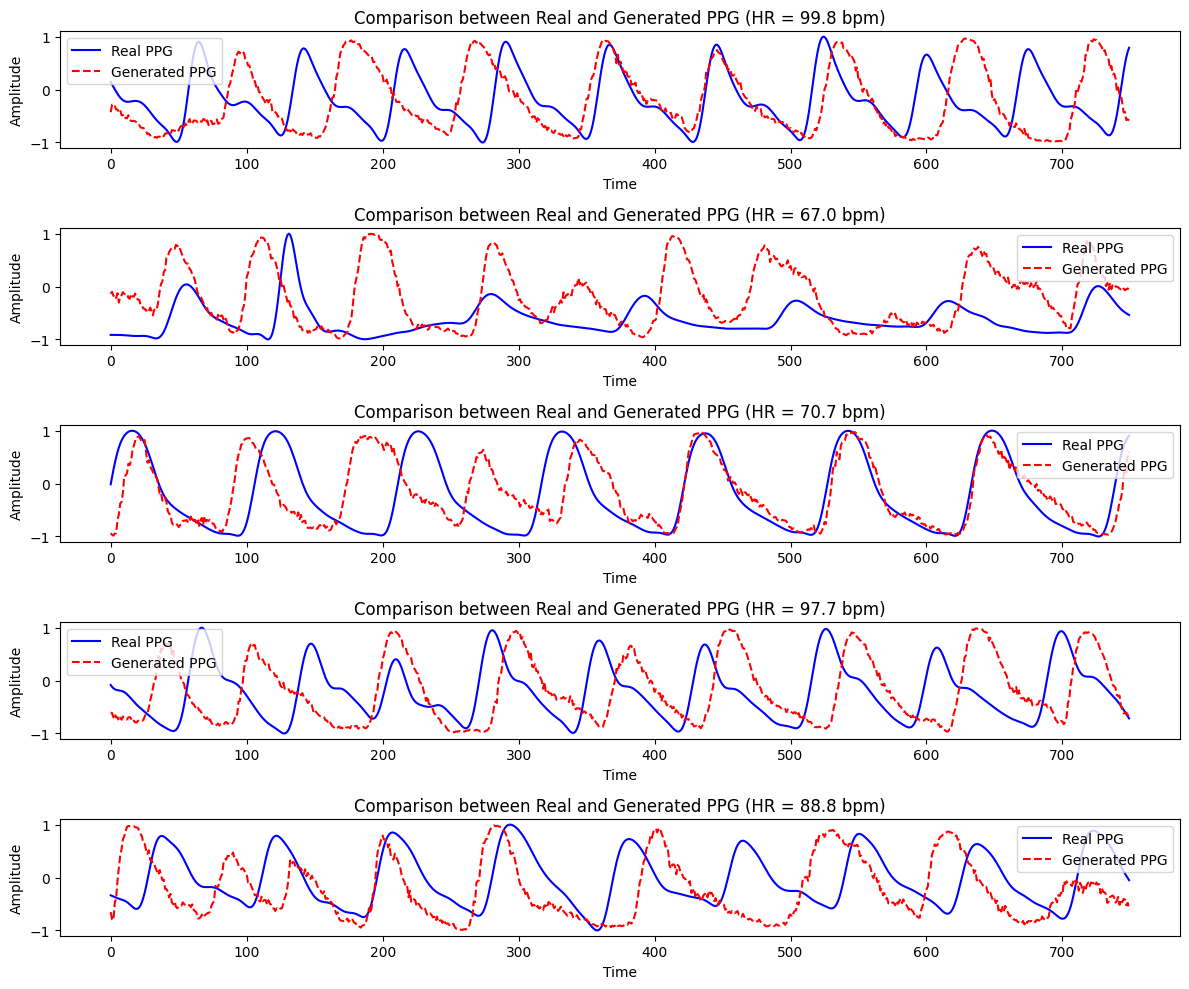

In [59]:
# In ra 5 t√≠n hi·ªáu PPG sinh t·ª´ Generator d·ª±a tr√™n c√°c gi√° tr·ªã HR chu·∫©n h√≥a
num_samples = 5

# V·∫Ω ƒë·ªì th·ªã
plt.figure(figsize=(12, 10))

for i in range(num_samples):
    # Ch·ªçn ch·ªâ s·ªë ng·∫´u nhi√™n HR t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán
    hr_idx = np.random.randint(0, len(hr_raw_train_normalized))
    
    # L·∫•y gi√° tr·ªã HR chu·∫©n h√≥a
    hr_test = torch.tensor([hr_raw_train_normalized[hr_idx]], dtype=torch.float32).to(device)  # Chuy·ªÉn v·ªÅ float32
    
    # Th√™m chi·ªÅu ƒë·ªÉ gh√©p v·ªõi z (chuy·ªÉn t·ª´ (1,) th√†nh (1, 1))
    hr_test = hr_test.view(-1, 1)  # T·∫°o tensor 2 chi·ªÅu c√≥ shape (1, 1)
    
    # Sinh t√≠n hi·ªáu PPG t·ª´ Generator
    z_test = torch.randn(1, noise_dim, dtype=torch.float32).to(device)  # Chuy·ªÉn v·ªÅ float32
    fake_ppg_test = generator(z_test, hr_test)
    
    # L·∫•y t√≠n hi·ªáu PPG th·∫≠t t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán
# L·∫•y t√≠n hi·ªáu PPG th·∫≠t t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán v√† chuy·ªÉn th√†nh numpy array tr∆∞·ªõc khi chuy·ªÉn th√†nh tensor
    real_ppg_test = torch.tensor(np.array([X_train_filtered[hr_idx]]), dtype=torch.float32).to(device)
    
    # Chuy·ªÉn HR chu·∫©n h√≥a v·ªÅ HR th·ª±c
    actual_hr = denormalize_hr(hr_test.item())
    
    # In t√≠n hi·ªáu PPG sinh v√† th·∫≠t
    print(f"Generated PPG for HR = {actual_hr:.1f} bpm:")
    print("Generated PPG Signal:", fake_ppg_test)
    print("Real PPG Signal:", real_ppg_test)
    
    # V·∫Ω t√≠n hi·ªáu PPG sinh v√† th·∫≠t
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(real_ppg_test.cpu().detach().numpy()[0], label='Real PPG', linestyle='-', color='b')
    plt.plot(fake_ppg_test.cpu().detach().numpy()[0], label='Generated PPG', linestyle='--', color='r')
    plt.title(f'Comparison between Real and Generated PPG (HR = {actual_hr:.1f} bpm)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()